# **Prediksi Langganan Deposito**

- **Tim:** THR
- **Lead Team Name:** Prayuganingtyas Eka Saputri

## Import Library

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

# Statistik & transformasi
from scipy.stats import yeojohnson

# Preprocessing & Scalers
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# Split data
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, ConfusionMatrixDisplay
)

## Data

In [3]:
train_df = pd.read_csv('training_dataset.csv')
valid_df = pd.read_csv('validation_set.csv')

In [4]:
display(train_df.head(5))
display(valid_df.head(5))

,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau,berlangganan_deposito
0,531036,63,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,jul,...,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,Papua,1
1,999241,43,teknisi,menikah,Pendidikan Tinggi,no,yes,no,cellular,nov,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,Sulawesi,0
2,995002,29,sosial media specialis,lajang,Pendidikan Tinggi,no,yes,yes,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,Papua,0
3,932750,40,pekerja kasar,menikah,SMA,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,Sumatera,1
4,684699,40,sosial media specialis,lajang,Pendidikan Tinggi,no,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,Bali,0


,customer_number,usia,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,...,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,hasil_kampanye_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,pulau
0,445420,35,penyedia jasa,menikah,SMA,no,yes,yes,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,Jawa
1,585604,52,teknisi,lajang,Diploma,unknown,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,Papua
2,888824,37,pekerja kasar,menikah,SMP,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,Bali
3,816820,51,pengangguran,menikah,Diploma,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Sumatera
4,542716,45,teknisi,cerai,SMA,no,yes,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,Sumatera


In [5]:
# ukuran data
train_df.shape

(22916, 22)

Data train memiliki 22.916 baris dan 22 kolom

In [6]:
# tipe data masing-masing variabel
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22916 entries, 0 to 22915
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_number               22916 non-null  int64  
 1   usia                          22916 non-null  int64  
 2   pekerjaan                     22916 non-null  object 
 3   status_perkawinan             22916 non-null  object 
 4   pendidikan                    22916 non-null  object 
 5   gagal_bayar_sebelumnya        22916 non-null  object 
 6   pinjaman_rumah                22916 non-null  object 
 7   pinjaman_pribadi              22916 non-null  object 
 8   jenis_kontak                  22916 non-null  object 
 9   bulan_kontak_terakhir         22916 non-null  object 
 10  hari_kontak_terakhir          22916 non-null  object 
 11  jumlah_kontak_kampanye_ini    22916 non-null  int64  
 12  hari_sejak_kontak_sebelumnya  22916 non-null  int64  
 13  j

Setiap kolom sudah sesuai tipe datanya.

In [7]:
# missing values
train_df.isna().sum()

,0
customer_number,0
usia,0
pekerjaan,0
status_perkawinan,0
pendidikan,0
gagal_bayar_sebelumnya,0
pinjaman_rumah,0
pinjaman_pribadi,0
jenis_kontak,0
bulan_kontak_terakhir,0


Tidak ada missing values

In [8]:
# duplikasi data
print("Jumlah duplikasi: ", train_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [9]:
# statistik deskriptif kolom numerik
train_df.describe()

,customer_number,usia,jumlah_kontak_kampanye_ini,hari_sejak_kontak_sebelumnya,jumlah_kontak_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,suku_bunga_euribor_3bln,jumlah_pekerja,berlangganan_deposito
count,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000,22916.000000
mean,550930.993193,40.016233,2.561878,962.210377,0.170143,0.077915,93.576541,-40.485717,3.617890,5166.773124,0.114069
std,259909.889175,10.438059,2.794178,187.566774,0.490611,1.576176,0.580586,4.641091,1.737591,72.479698,0.317902
min,100108.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,325755.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,553139.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,777157.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,999997.000000,98.000000,42.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


pada kolom `hari_sejak_kontak_sebelumnya` terdapat nilai 999 yang artinya belum pernah dihubungi sebelumnya

In [10]:
# statistik deskriptif kolom kategorik
train_df.describe(include='object')

,pekerjaan,status_perkawinan,pendidikan,gagal_bayar_sebelumnya,pinjaman_rumah,pinjaman_pribadi,jenis_kontak,bulan_kontak_terakhir,hari_kontak_terakhir,hasil_kampanye_sebelumnya,pulau
count,22916,22916,22916,22916,22916,22916,22916,22916,22916,22916,22916
unique,12,4,8,3,3,3,2,10,5,3,8
top,sosial media specialis,menikah,Pendidikan Tinggi,no,yes,no,cellular,may,thu,nonexistent,Jawa
freq,5755,13858,6699,18169,12053,18888,14523,7611,4828,19836,2973


In [11]:
# Fungsi untuk membuat boxplot beberapa kolom secara bersamaan
def plot_boxplots(data, columns, cols_per_row):
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / cols_per_row)

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(12, 3*num_rows))

    # Jika hanya 1 baris, axes akan menjadi 1D array
    axes = axes.flatten() if num_rows > 1 else [axes]

    for i, col in enumerate(columns):
        ax = axes[i]
        ax.boxplot(data[col].dropna())
        ax.set_title(f'Box Plot of {col}')
        ax.set_ylabel(col)

    # Sembunyikan axes yang tidak terpakai
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
# Buat list yang berisikan kolom-kolom numerik
numerical_cols = [cname for cname in train_df.columns
                  if train_df[cname].dtype in ['int64', 'float64']
                  and cname not in ['customer_number','berlangganan_deposito']]

print(numerical_cols)

['usia', 'jumlah_kontak_kampanye_ini', 'hari_sejak_kontak_sebelumnya', 'jumlah_kontak_sebelumnya', 'tingkat_variasi_pekerjaan', 'indeks_harga_konsumen', 'indeks_kepercayaan_konsumen', 'suku_bunga_euribor_3bln', 'jumlah_pekerja']


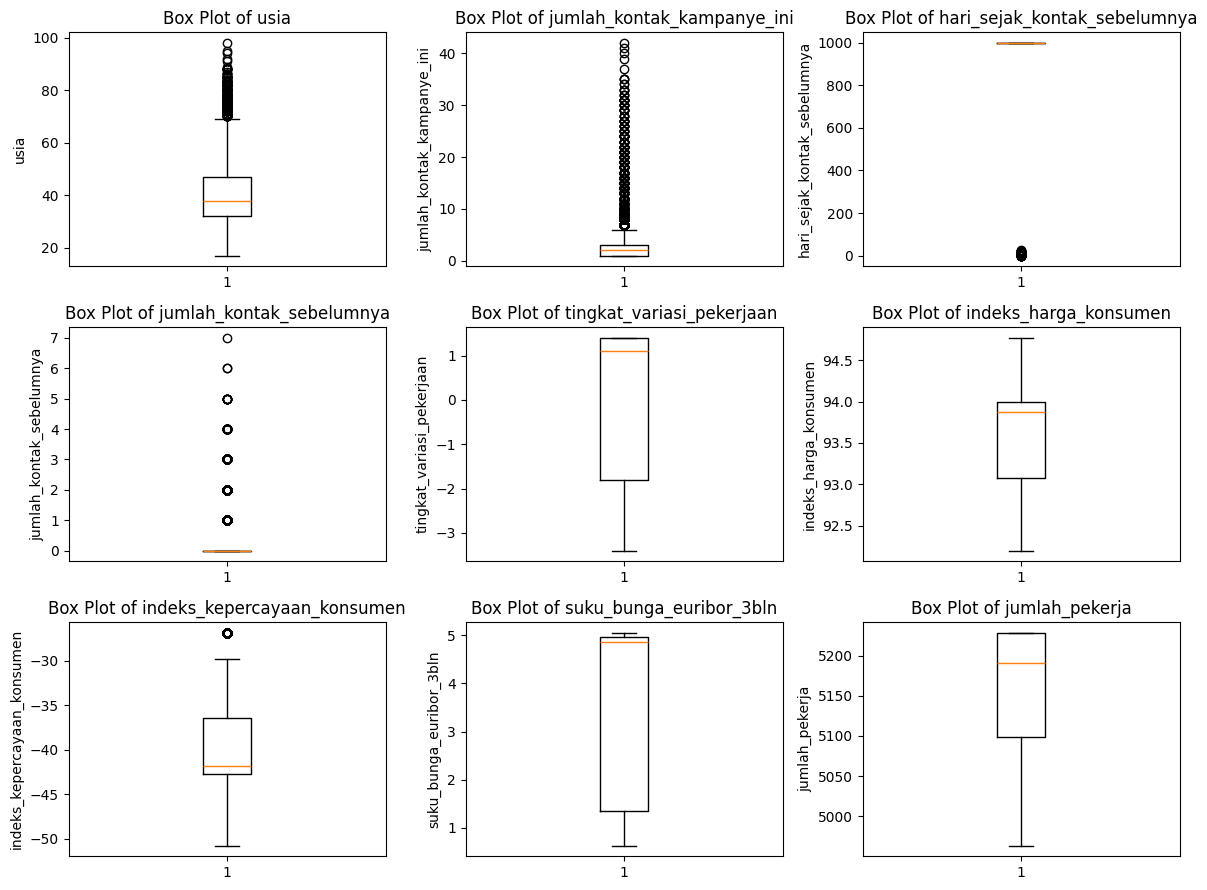

In [13]:
# boxplot kolom numerik train_df
plot_boxplots(train_df, numerical_cols, 3)

Dari boxplot di atas dapat dilihat bahwa pada kolom `usia`, `jumlah_kontak_kampanye_ini`, `hari_sejak_kontak_sebelumnya`, `jumlah_kontak_sebelumnya`, dan `indeks_kepercayaan_konsumen` terdapat outlier, yang ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

## Exploratory Data Analysis (EDA)
Tahapan ini dilakukan untuk mendapatkan insight yang bermanfaat dari data.

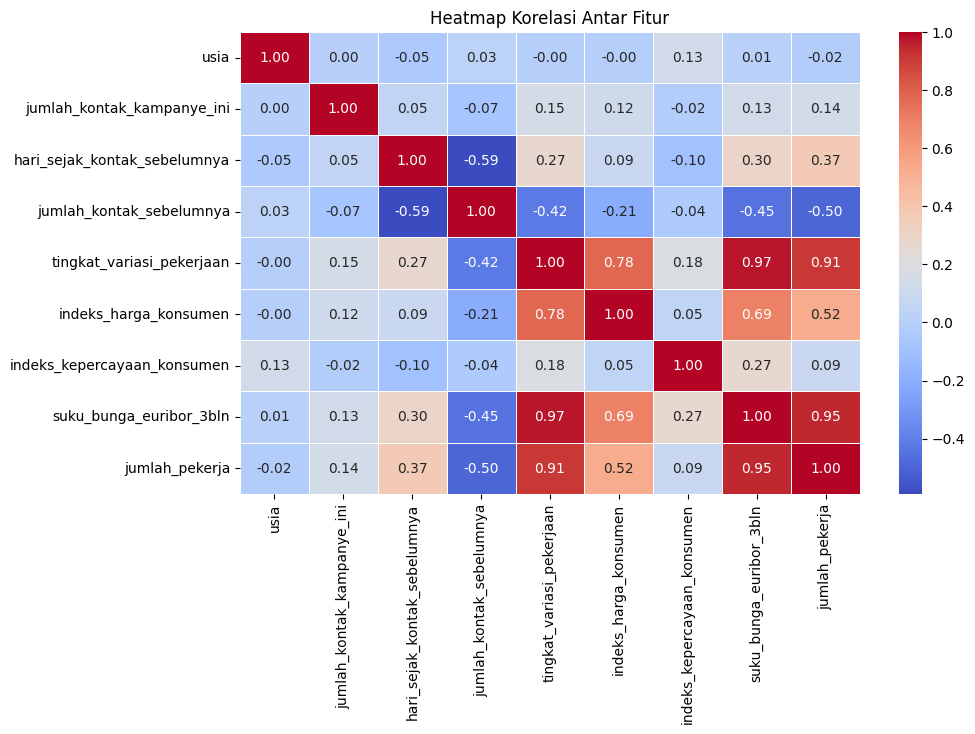

In [14]:
# korelasi antar kolom numerik
numerical_corr = train_df[numerical_cols].corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Terdapat multikolinearitas yaitu kolerasi yang sangat tinggi antara dua fitur numerik.

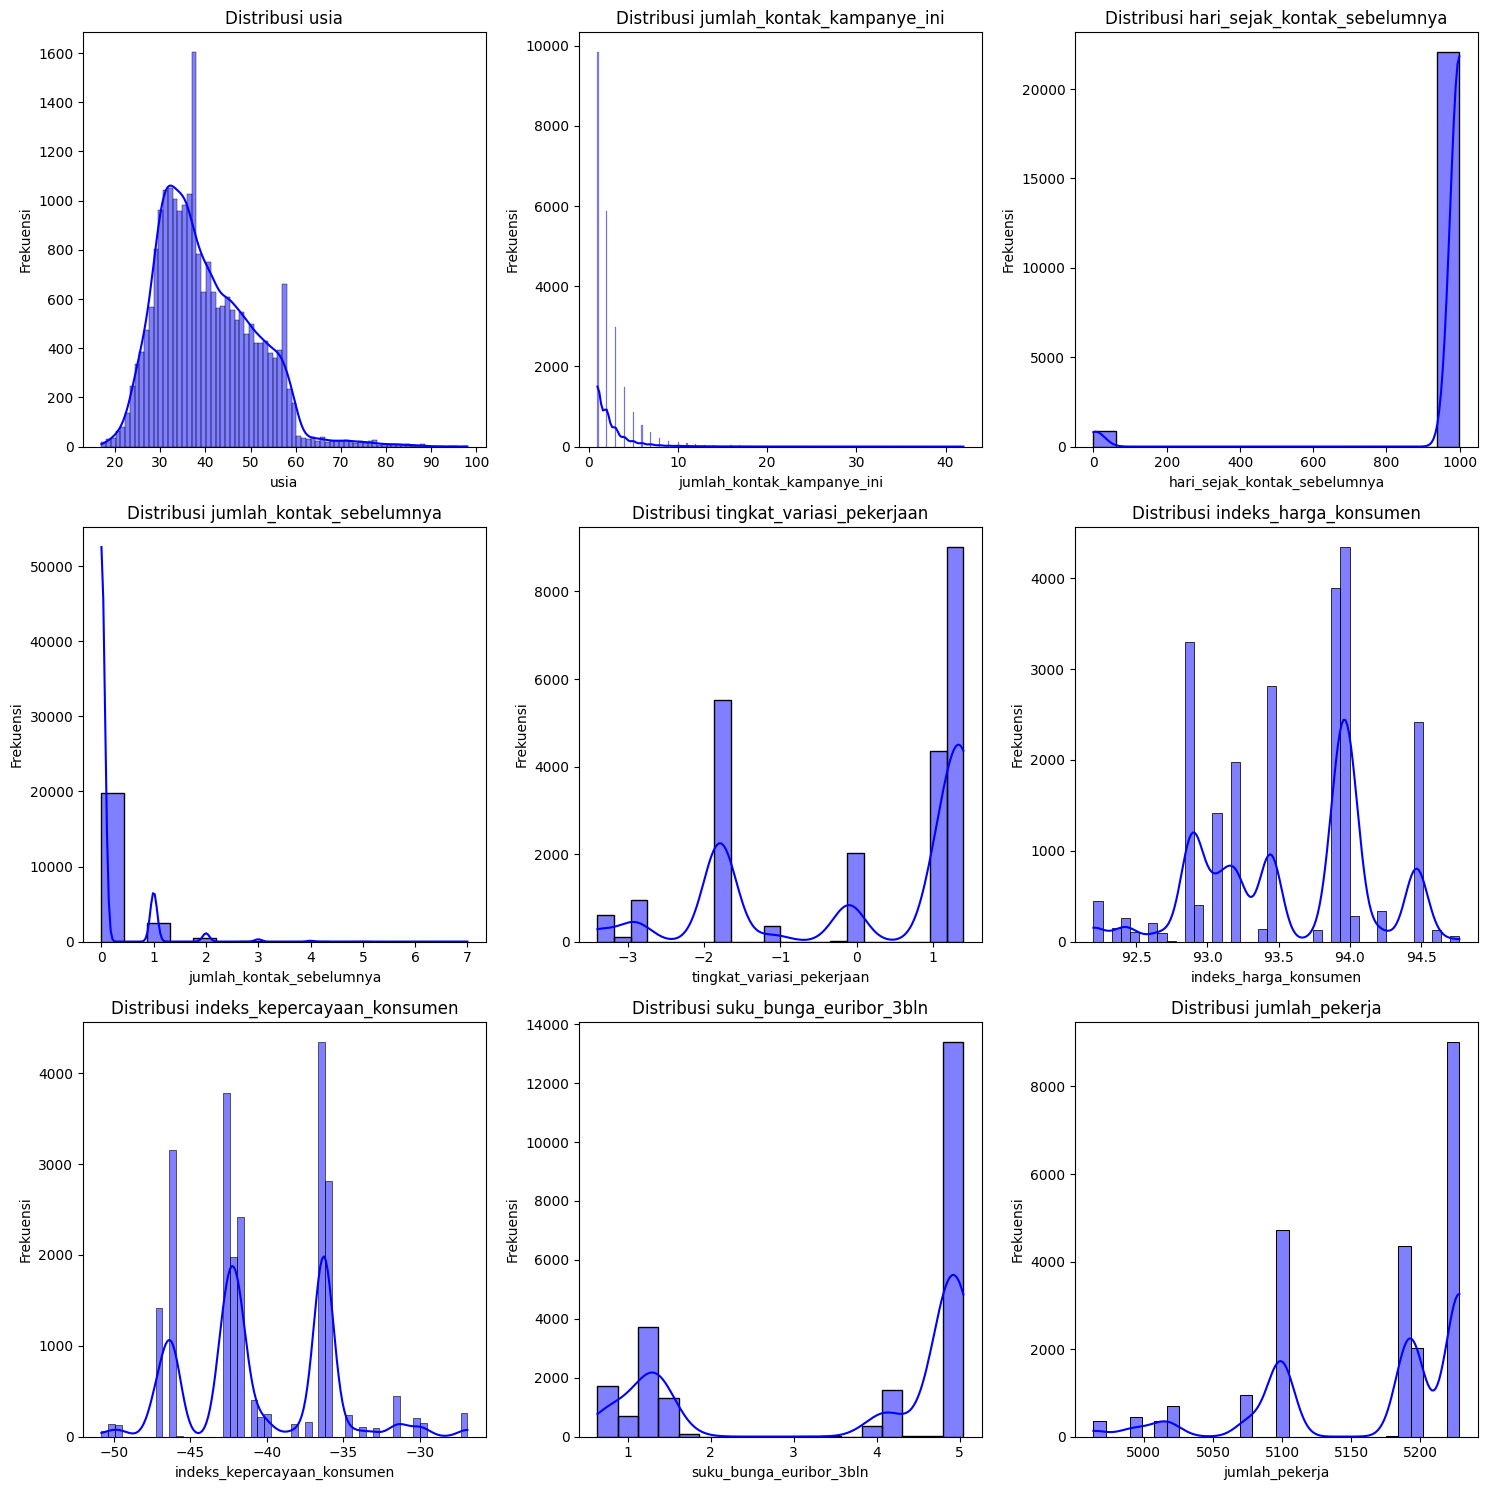

In [15]:
num_cols = len(numerical_cols)

n_rows = math.ceil(num_cols / 4)
n_cols = 3

# Membuat subplot
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train_df[col], kde=True, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [16]:
# list yang berisikan kolom-kolom kategorik
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object']

print(categorical_cols)

['pekerjaan', 'status_perkawinan', 'pendidikan', 'gagal_bayar_sebelumnya', 'pinjaman_rumah', 'pinjaman_pribadi', 'jenis_kontak', 'bulan_kontak_terakhir', 'hari_kontak_terakhir', 'hasil_kampanye_sebelumnya', 'pulau']


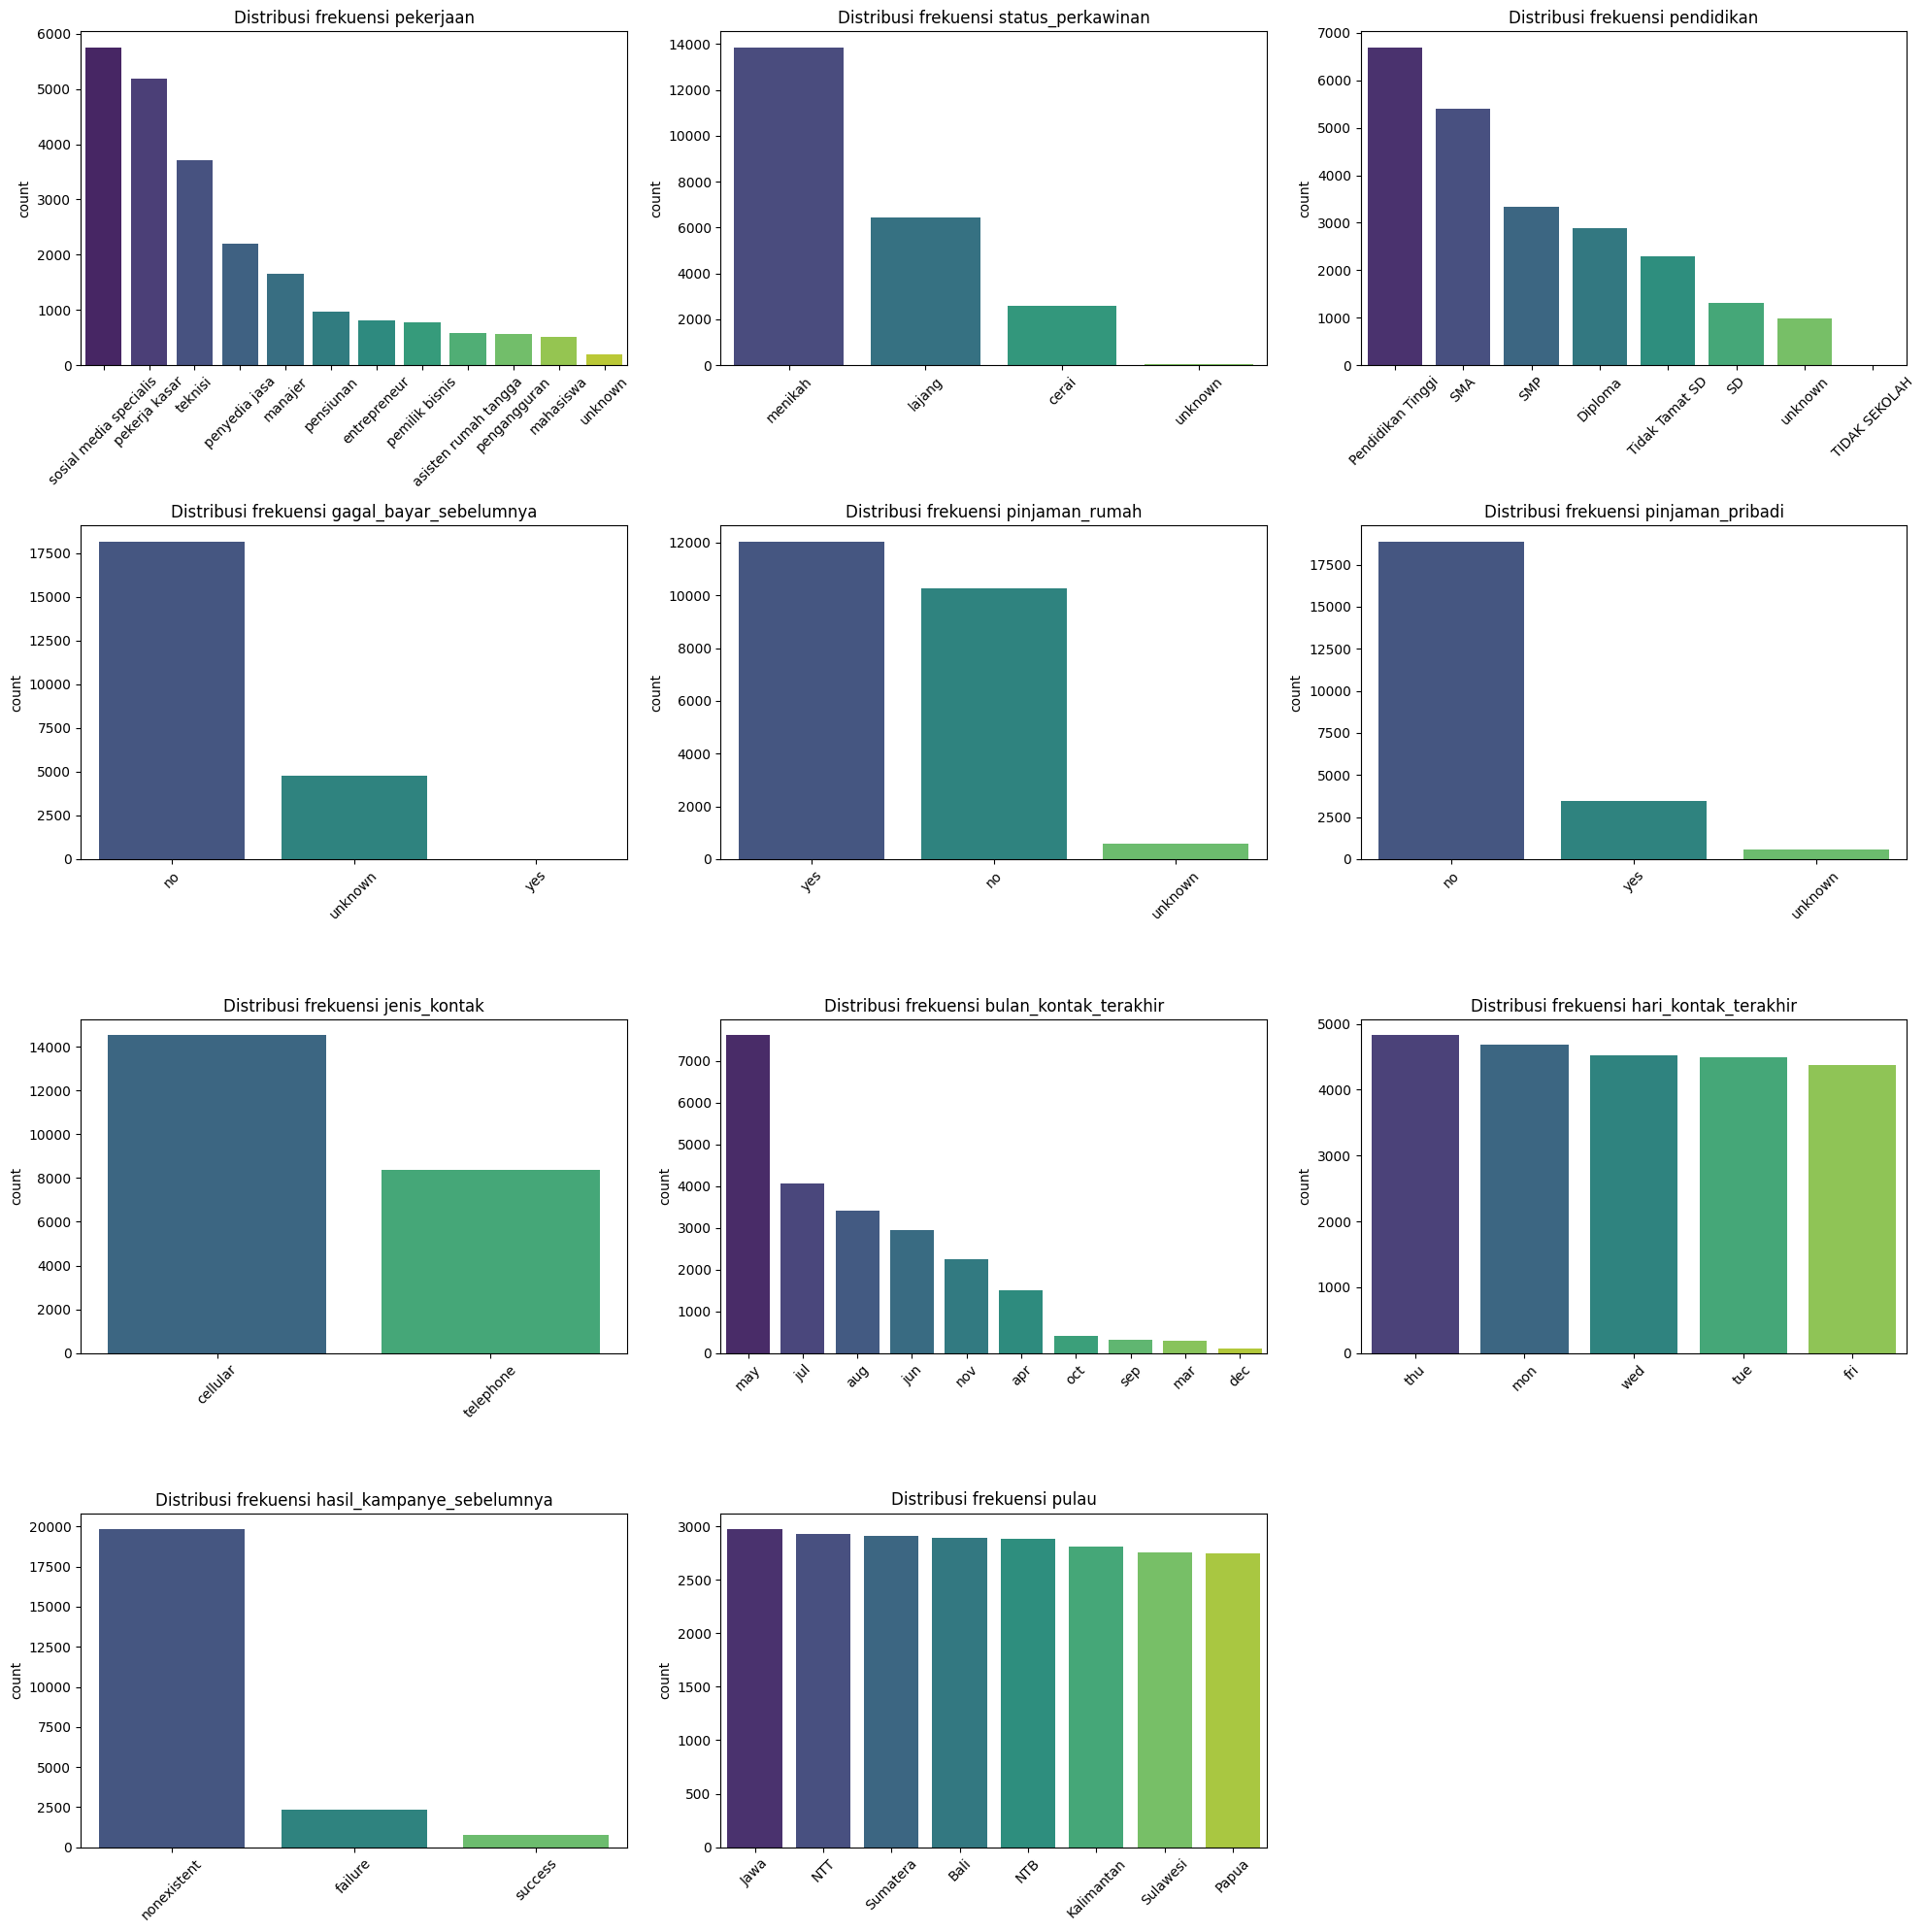

In [17]:
cat_cols = len(categorical_cols)
n_cols = 3
n_rows = (cat_cols + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5*n_rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=train_df[col], palette='viridis',
                 order=train_df[col].value_counts().index)
    plt.title(f'Distribusi frekuensi {col}')
    plt.xticks(rotation=45)
    plt.xlabel('')
plt.tight_layout()
plt.show()

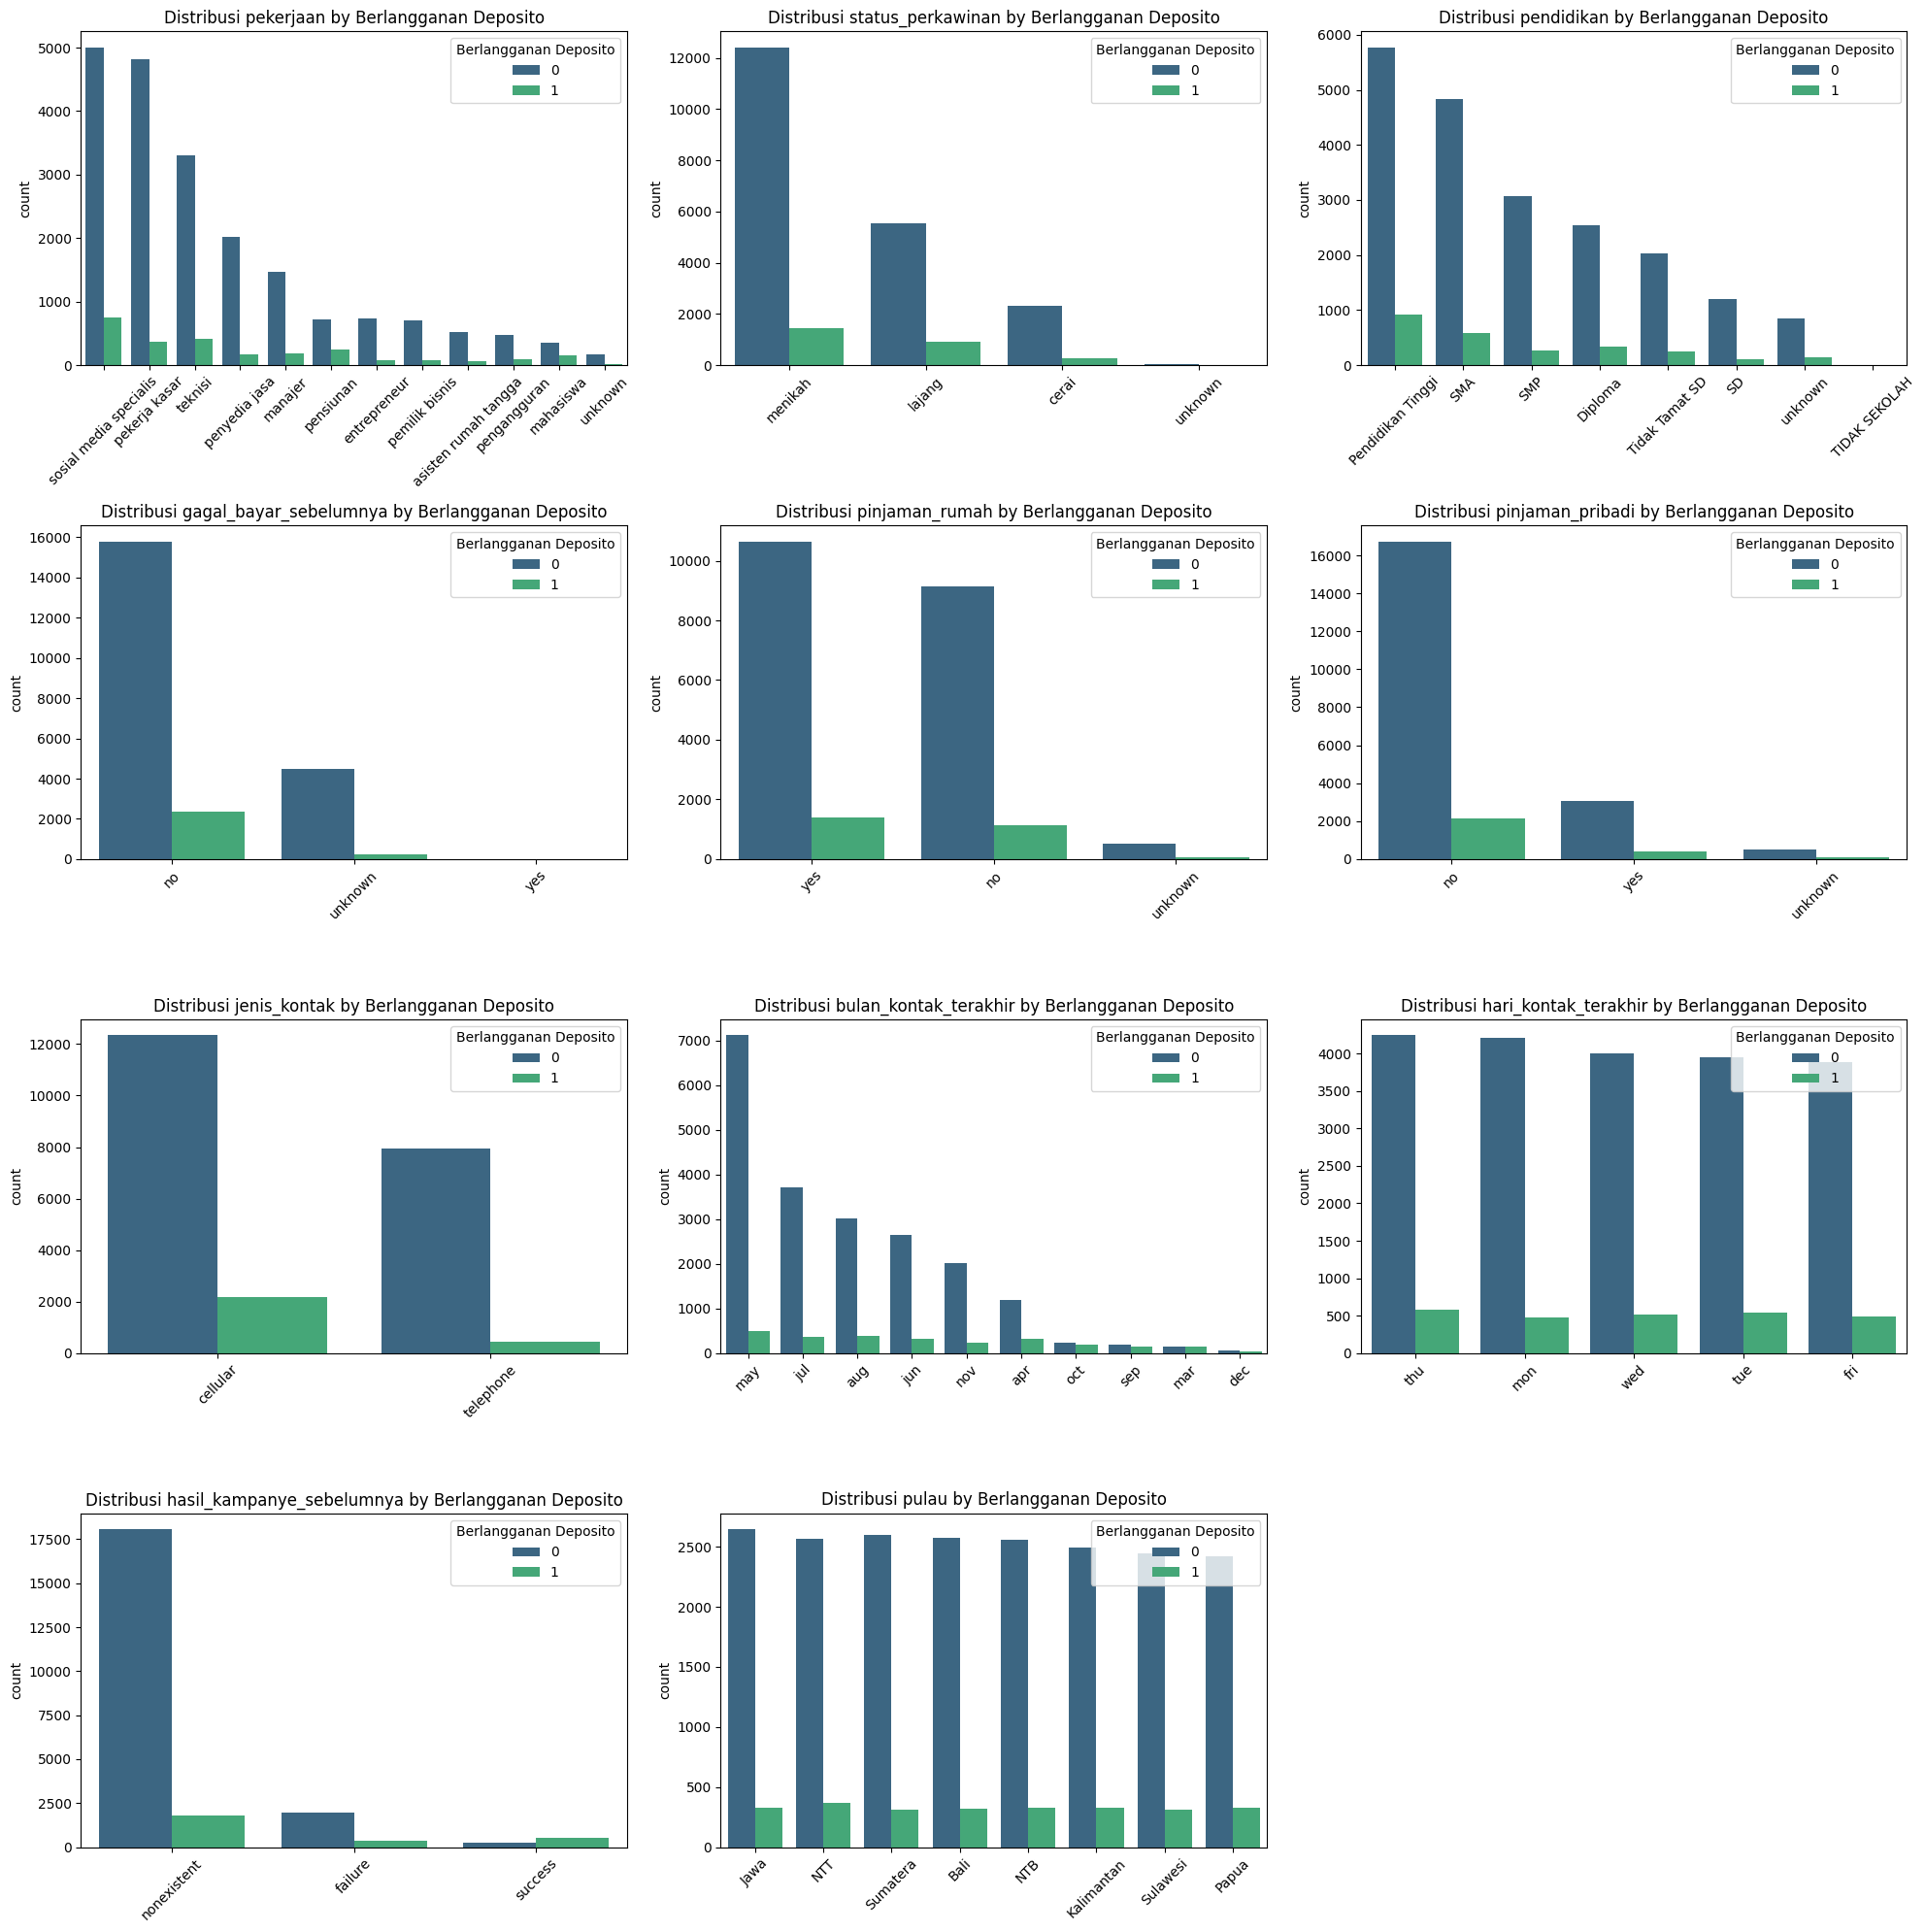

In [18]:
cat_cols = len(categorical_cols)
n_cols = 3
n_rows = (cat_cols + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5*n_rows))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, hue='berlangganan_deposito', data=train_df, palette='viridis',
                 order=train_df[col].value_counts().index)
    plt.title(f'Distribusi {col} by Berlangganan Deposito')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.legend(title='Berlangganan Deposito', loc='upper right')
plt.tight_layout()
plt.show()

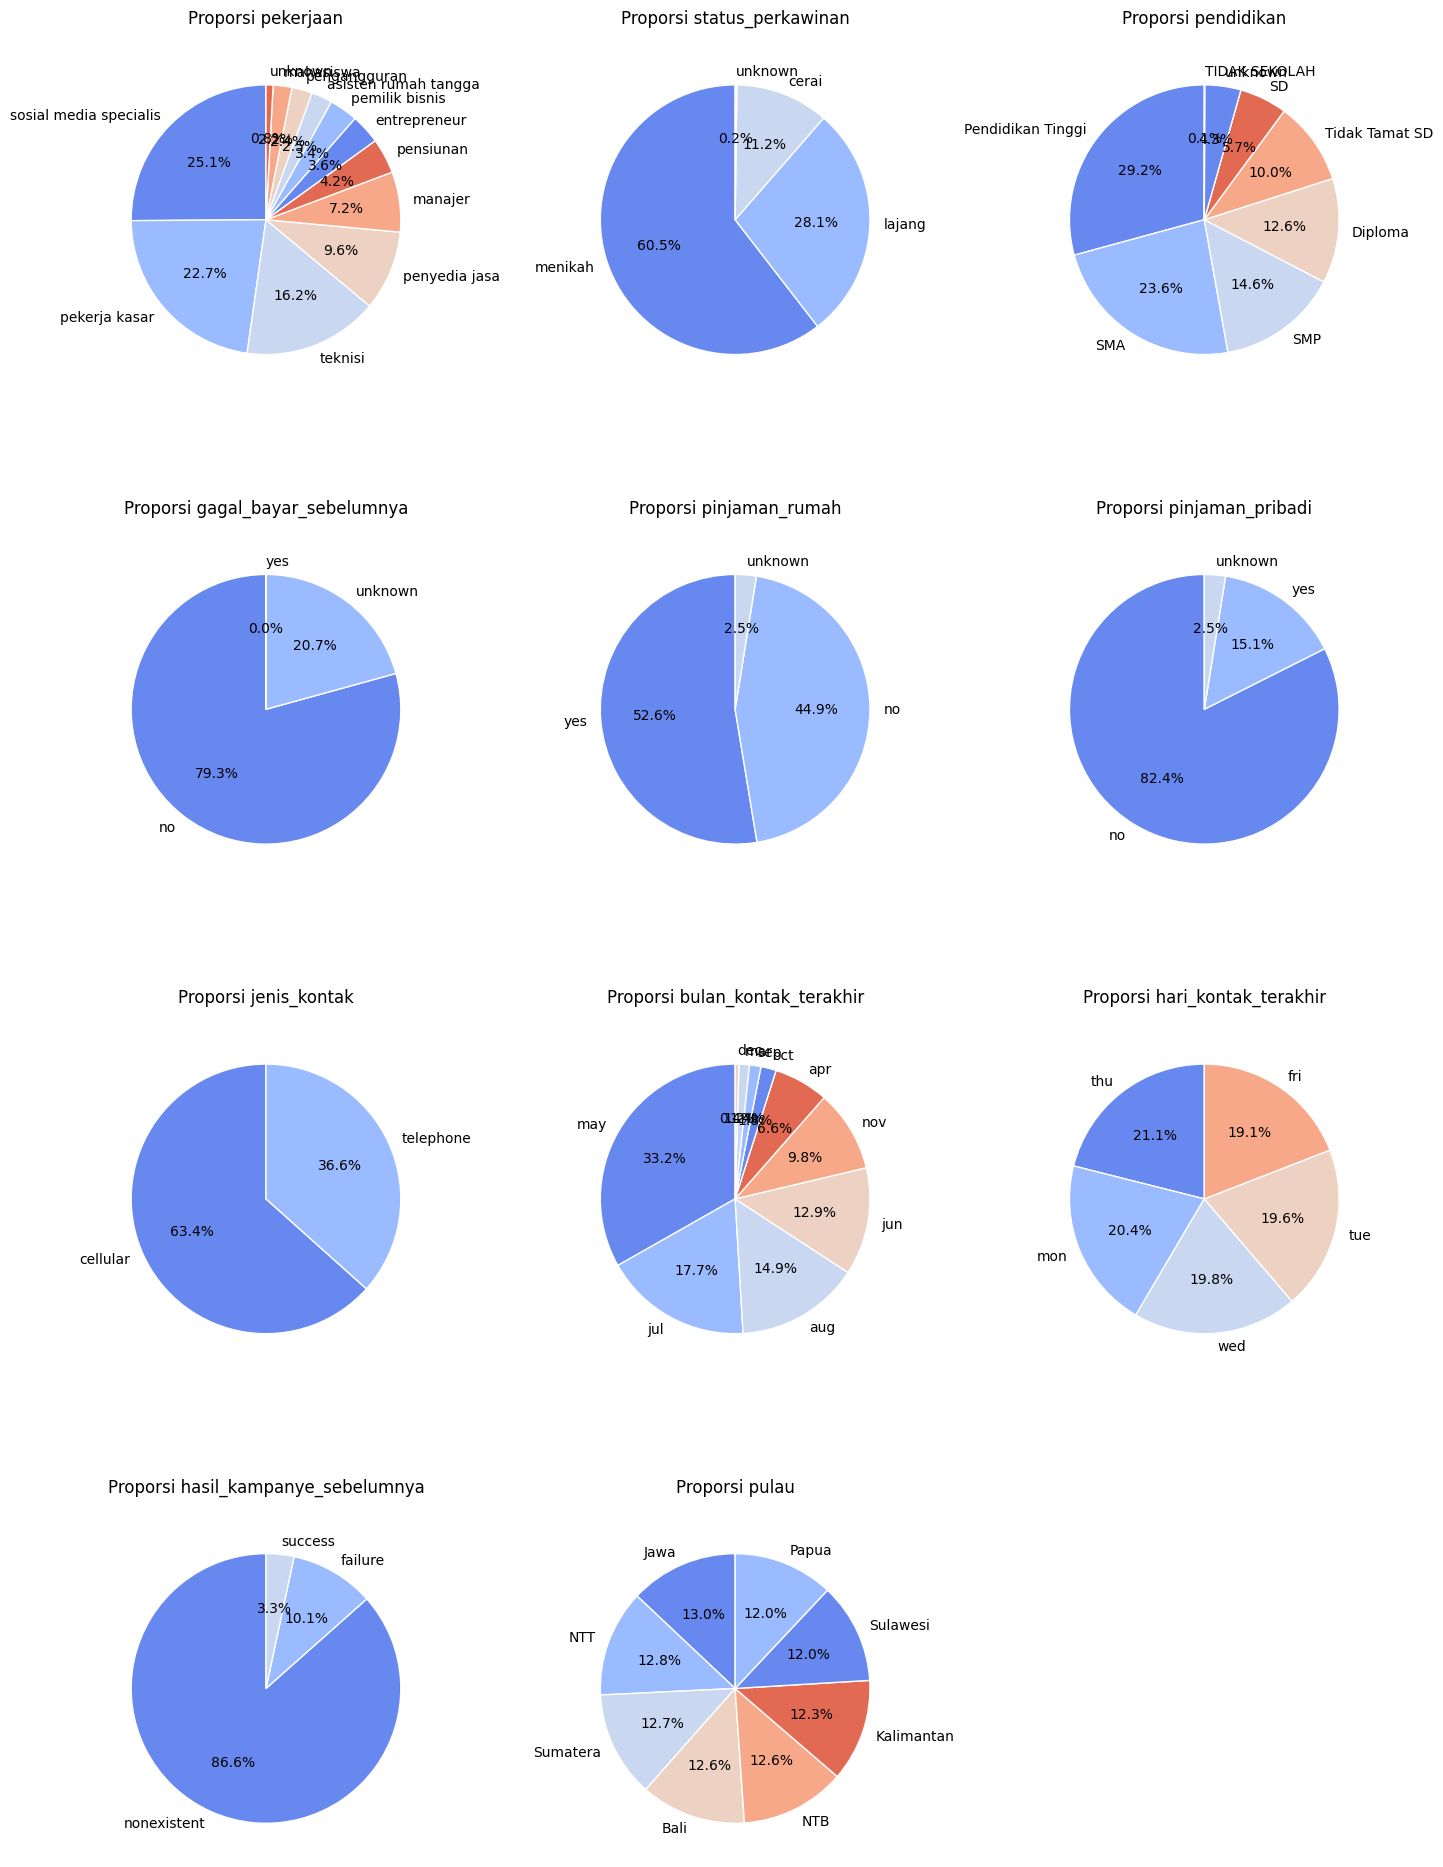

In [19]:
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    # Buat pie chart dengan autopct dan warna yang konsisten
    train_df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('coolwarm'),
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 10}
    )

    plt.title(f'Proporsi {col}', pad=20)
    plt.ylabel('')

plt.tight_layout(pad=3.0)
plt.show()

## Prepocessing

Preprocessing untuk Data Training

In [20]:
# DROP KOLOM TIDAK RELEVAN
train_df = train_df.drop(columns=['customer_number','tingkat_variasi_pekerjaan', 'jumlah_pekerja'])

Menghapus kolom yang tidak relevan atau tidak berguna untuk prediksi.

In [21]:
# SPLIT DATA
y = train_df['berlangganan_deposito']
X = train_df.drop('berlangganan_deposito', axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [22]:
# IDENTIFIKASI KOLOM
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [23]:
# SCALING KOLOM NUMERIK
scl = MinMaxScaler()
X_train_scaled = pd.DataFrame(scl.fit_transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index)
X_val_scaled = pd.DataFrame(scl.transform(X_val[numerical_cols]), columns=numerical_cols, index=X_val.index)

Melakukan normalisasi (Min-Max Scaling) terhadap fitur numerik agar berada dalam rentang 0–1, agar model tidak berat sebelah ke fitur yang skala nilainya besar.

In [24]:
# ENCODING KOLOM KATEGORIK
# Pisahkan kolom dengan sedikit dan banyak kategori
few_unique = [col for col in categorical_cols if X_train[col].nunique() <= 3]
many_unique = [col for col in categorical_cols if X_train[col].nunique() > 3]

# Label Encoding (sedikit kategori)
X_train_label = X_train[few_unique].copy()
X_val_label = X_val[few_unique].copy()

le = LabelEncoder()
for col in few_unique:
    le.fit(X_train[col])
    X_train_label[col] = le.transform(X_train[col])
    X_val_label[col] = le.transform(X_val[col])

# One Hot Encoding (banyak kategori)
X_train_ohe = pd.get_dummies(X_train[many_unique], drop_first=True)
X_val_ohe = pd.get_dummies(X_val[many_unique], drop_first=True)

Label Encoding digunakan pada kolom dengan sedikit kategori karena metode ini lebih efisien secara komputasi dan tidak menambah dimensi data secara signifikan. Sementara itu, One Hot Encoding diterapkan pada kolom dengan banyak kategori untuk menjaga akurasi secara semantik dan numerik, karena metode ini tidak mengasumsikan adanya urutan antar kategori, sehingga lebih sesuai untuk model-model yang sensitif terhadap makna numerik

In [25]:
# Reindex supaya kolomnya sama
X_val_ohe = X_val_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

Memastikan bahwa X_val memiliki struktur kolom yang sama persis dengan X_train setelah One Hot Encoding.

In [26]:
# GABUNGKAN SEMUA
X_train_final = pd.concat([X_train_scaled, X_train_label, X_train_ohe], axis=1)
X_val_final = pd.concat([X_val_scaled, X_val_label, X_val_ohe], axis=1)

## Pemodelan

In [28]:
# Base estimators untuk stack
estimators = [
    ('catboost', CatBoostClassifier(iterations=200, depth=6, learning_rate=0.05, silent=True, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=150, learning_rate=0.05, max_depth=5, silent=True, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=150, max_depth=5, learning_rate=0.1, random_state=42))
]

# Stacking classifier
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    stack_method='predict_proba',
    n_jobs=-1
)

In [29]:
# Model-model yang akan dievaluasi
models_baseline_vs_stack = {
    'AdaBoost': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    ),

    'XGBoost': XGBClassifier(
        objective='binary:logistic',
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42,
        eval_metric='auc'
    ),

    'CatBoost': CatBoostClassifier(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        silent=True,
        random_state=42
    ),

    'LightGBM': LGBMClassifier(
        n_estimators=100,
        max_depth=-1,
        learning_rate=0.1,
        random_state=42,
        objective='binary',
        metric='auc',
        verbosity=-1,
        silent=True
    ),

    'Stacking': stack
}

In [30]:
# Fungsi evaluasi seperti sebelumnya
def evaluate_models(X_train_final, X_val_final, y_train, y_test, models):
    results = []

    for name, model in models.items():
        model.fit(X_train_final, y_train)
        y_pred = model.predict(X_val_final)
        y_pred_proba = model.predict_proba(X_val_final)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        f1 = f1_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'F1 Weighted': f1,
            'Precision': precision,
            'Recall': recall
        })

    return pd.DataFrame(results)

In [31]:
# Evaluasi model dengan data 60% fitur teratas
hasil_perbandingan = evaluate_models(X_train_final, X_val_final, y_train, y_val, models_baseline_vs_stack)

# Urutkan berdasarkan ROC AUC
hasil_perbandingan.sort_values('ROC AUC', ascending=False)

,Model,Accuracy,ROC AUC,F1 Weighted,Precision,Recall
4,Stacking,0.900332,0.798568,0.657476,0.786982,0.619499
1,XGBoost,0.899983,0.797499,0.641740,0.798391,0.605291
2,CatBoost,0.899633,0.794789,0.647949,0.788754,0.611098
3,LightGBM,0.898237,0.789324,0.659871,0.768639,0.623654
0,AdaBoost,0.897015,0.788688,0.625132,0.782679,0.592941


Model terbaik berdasarkan nilai ROC AUC adalah model Stacking, dengan skor tertinggi sebesar 0.798568. Selain itu, Stacking juga memiliki nilai accuracy tertinggi (0.900332) dan performa F1 yang kompetitif.

## Model


Tuning dilakukan pada XGBoost karena memiliki performa awal terbaik. Tujuannya untuk meningkatkan akurasi dan ROC AUC melalui optimasi hyperparameter. Hasil tuning ini kemudian digunakan sebagai base model dalam stacking, agar kinerja keseluruhan model ensemble menjadi lebih optimal.

In [32]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_final, y_train)

# Ambil model terbaik
best_xgb = random_search.best_estimator_

print("Best XGBoost Params:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}


Model ini menggunakan teknik stacking, yaitu menggabungkan beberapa model machine learning (Random Forest, XGBoost, LightGBM, dan CatBoost) untuk meningkatkan performa prediksi.

In [33]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', best_xgb),  # <- hasil tuning
    ('lgb', lgb.LGBMClassifier(random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=True,
    n_jobs=-1
)
# Train
stack_model.fit(X_train_final, y_train)

# Predict
y_pred_stack = stack_model.predict(X_val_final)
y_proba_stack = stack_model.predict_proba(X_val_final)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred_stack))
print("ROC AUC:", roc_auc_score(y_val, y_proba_stack))
print(classification_report(y_val, y_pred_stack))


Accuracy: 0.8999825449467621
ROC AUC: 0.8001967339924723
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5076
           1       0.66      0.26      0.37       653

    accuracy                           0.90      5729
   macro avg       0.78      0.62      0.66      5729
weighted avg       0.88      0.90      0.88      5729



## Prepocessing

Preprocessing untuk Data Validation

In [34]:
customer_ids = valid_df['customer_number'].copy()

In [35]:
# DROP KOLOM TIDAK RELEVAN
valid_df = valid_df.drop(columns=['customer_number','tingkat_variasi_pekerjaan', 'jumlah_pekerja'])

In [36]:
# IDENTIFIKASI KOLOM
numerical_cols = valid_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = valid_df.select_dtypes(include=['object']).columns

In [37]:
# SCALING KOLOM NUMERIK
valid_scaled = pd.DataFrame(
    scl.transform(valid_df[numerical_cols]),
    columns=numerical_cols,
    index=valid_df.index
)

In [38]:
# ENCODING KOLOM KATEGORIK
# Sesuaikan pembagian kategori berdasarkan X_train
few_unique = [col for col in categorical_cols if X_train[col].nunique() <= 3]
many_unique = [col for col in categorical_cols if X_train[col].nunique() > 3]

# Label Encoding (untuk sedikit kategori)
valid_label = valid_df[few_unique].copy()
for col in few_unique:
    le = LabelEncoder()
    le.fit(X_train[col])  # fit dari X_train
    valid_label[col] = le.transform(valid_df[col])

# One Hot Encoding (untuk banyak kategori)
valid_ohe = pd.get_dummies(valid_df[many_unique], drop_first=True)

In [39]:
# Reindex supaya kolomnya sama
valid_ohe = valid_ohe.reindex(columns=X_train_ohe.columns, fill_value=0)

In [40]:
# GABUNGKAN SEMUA
valid_final = pd.concat([valid_scaled, valid_label, valid_ohe], axis=1)

## Prediksi

In [41]:
# Prediksi probabilitas berlangganan deposito
valid_df['berlangganan_deposito'] = stack_model.predict_proba(valid_final)[:, 1]

# Gabungkan dengan customer_number
submission_df = pd.DataFrame({
    'customer_number': customer_ids,
    'berlangganan_deposito': valid_df['berlangganan_deposito']
})

submission_df.head()

,customer_number,berlangganan_deposito
0,445420,0.046120
1,585604,0.026924
2,888824,0.021950
3,816820,0.036812
4,542716,0.073285


In [42]:
# Simpan ke CSV
submission_df.to_csv('DCM_DMU_2025_Model_THR.csv', index=False)